# Spherical Decomposition of a Measured Field

## Step 1: Read Fieldfile

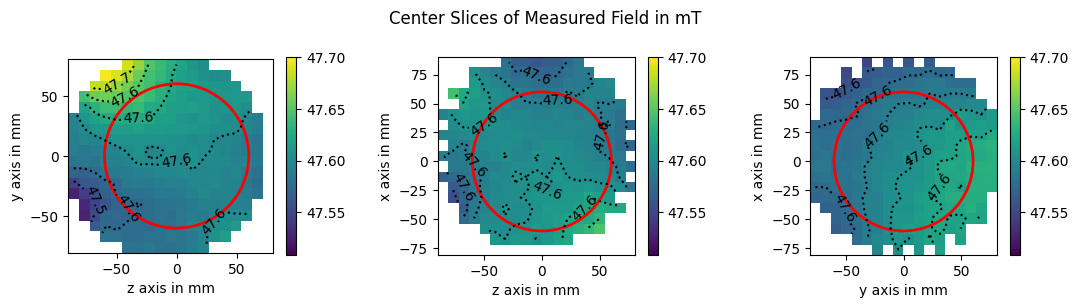

In [1]:
import numpy as np
from postprocessing.visualizer.plot_slices import plot_center_slices
from postprocessing.utilities.csv_importer import csv_import
from postprocessing.spherical_harmonics_tools import calcAngles, interpolMeshToSphere, calcSHcoefficents, calcMaxSHdegree

fieldfile = '_demo_data/measurement_1/raw_dat_magnet_coords.csv'

# parameters to convert field into spherical coordinates
phiNumber=30
thetaNumber=30
radius = 60 # radius on the sphere on which th spherical harmonics will be calculated

# define the max. order and degree for analysis. this must be equal or less than the max degree and order printed in step 3
lmax_input = 4 # max degree. 0... lmax
mmax_input = 6 # max order. -mmax ... 0 ... +mmax

# import field
field, x_values, y_values, z_values = csv_import(fieldfile, position_b0=5)

# display field
plot_center_slices(field, x_values, y_values, z_values, title="Center Slices of Measured Field in mT", circle_radius=radius, circle_center=(0,0,0))

## Step 2: Convert the Field into Spherical Coordinates

In [2]:


# get an array of angles phi and theta on which the SH coefficients will be calculated
phiRad, thetaRad = calcAngles(phiNumber, thetaNumber)

#0.107986#0.10 # in m, radius on which the SH coeffs will be calculated on

spherical_field = interpolMeshToSphere(field, phiRad, thetaRad, radius, _min=np.min(x_values), _max=np.max(x_values))

## Step 3: Calculate Spherical Harmonic Coefficients

In [3]:
# get an array of angles phi and theta on which the SH coefficients will be calculated
phiRad, thetaRad = calcAngles(phiNumber, thetaNumber)

# make a mesh of angles for shtools!
phiDeg, thetaDeg = np.rad2deg(phiRad), np.rad2deg(thetaRad)
lat, lon = np.meshgrid(thetaDeg, phiDeg) # latitude and longitude for shtools

lmax, mmax = calcMaxSHdegree(thetaNumber, phiNumber)

print('max sh degree: mmax = ' + str(lmax))
print('max sh order: lmax = ' + str(mmax))

if lmax < lmax_input or mmax < mmax_input:
    raise ValueError
else:
    lmax = lmax_input
    mmax = mmax_input


clmRecon = calcSHcoefficents(spherical_field, lat, lon, phiRad, thetaNumber, lmax, mmax, threshold = None)

max sh degree: mmax = 13
max sh order: lmax = 14


## Step 4: Plot SH Coeffs

/opt/homebrew/lib/python3.10/site-packages/pyshtools/shclasses/shcoeffs.py:3357: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/opt/homebrew/lib/python3.10/site-packages/pyshtools/shclasses/shcoeffs.py:2665: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


  name = None
  kind = 'real'
  normalization = 'ortho'
  csphase = 1
  lmax = 4
  error_kind = None
  header = None
  header2 = None
  units = None


(<Figure size 640x576 with 2 Axes>,
 <Axes: xlabel='Spherical Harmonic Order m', ylabel='Spherical Harmonic Degree l'>)

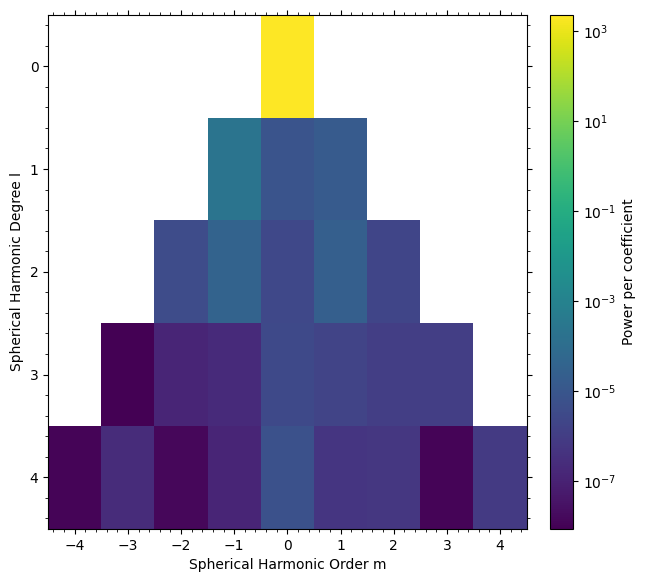

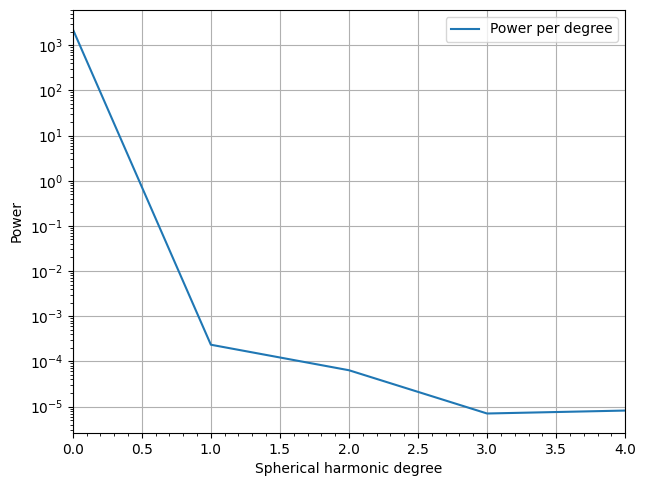

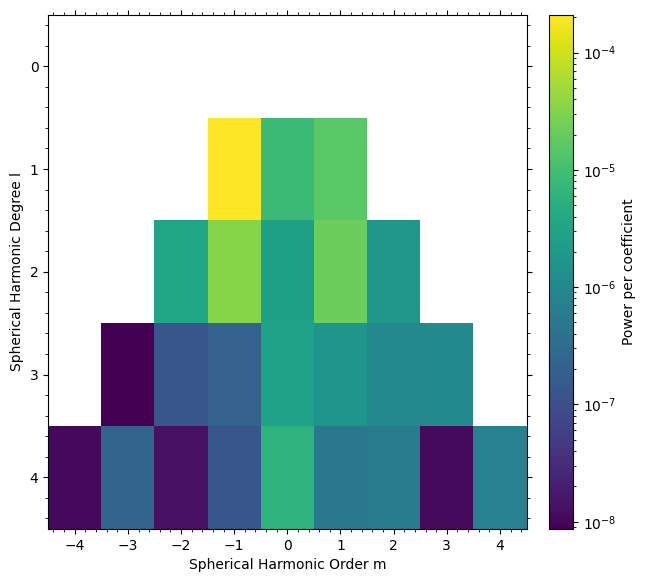

In [4]:
clmRecon.plot_spectrum2d(degree_label='Spherical Harmonic Degree l', order_label='Spherical Harmonic Order m')

clmRecon.plot_spectrum()

clmRecon.info()


# Suppress DC
clmRecon.set_coeffs(np.nan, 0, 0)
clmRecon.plot_spectrum2d(degree_label='Spherical Harmonic Degree l', order_label='Spherical Harmonic Order m')